### Import Libraries for data manipulation and analysis 


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 130

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [97]:
### reading the dataset

In [3]:
df = pd.read_csv('energydata_complete.csv')

### Visualize dataset first 5 rows 

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
df.shape

(19735, 29)

### Data info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Transform the feature 'Date' from object type into datetime type 

In [10]:
#convert object to datetime format
df['date'] = pd.to_datetime(df['date'])


In [11]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

### Change the indexof the dataframe to the date column in order to proceed with time series analysis 


In [13]:
#Set date column as Datetime index 
df = df.set_index('date')
df.head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Add new columns into the dataset: Year, Month, and Weekday 

In [15]:
# Add columns with year, month, and weekday name
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday_name'] = df.index.strftime('%A')

In [16]:
df.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,weekday_name
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016,5,Friday
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016,5,Friday
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016,5,Friday
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016,5,Friday
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851,2016,5,Friday


In [17]:
data = df[['Appliances']]

data.head()

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


In [18]:
# Maximum value
data.index.max()

Timestamp('2016-05-27 18:00:00')

In [19]:
# Minimum value
data.index.min()

Timestamp('2016-01-11 17:00:00')

## Visualizing Data and Time series 

In [21]:
data.describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


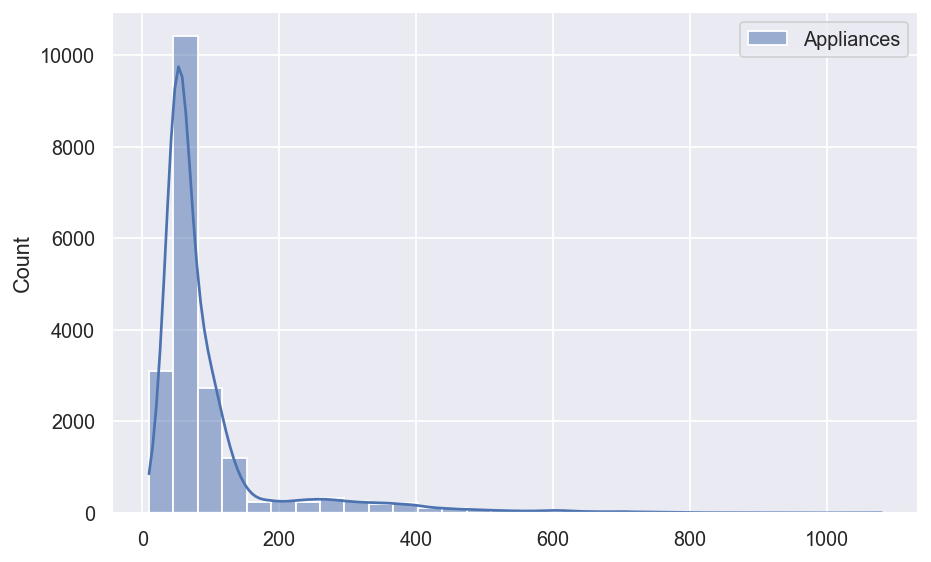

In [22]:
sns.histplot(data=data, bins=30, kde=True);

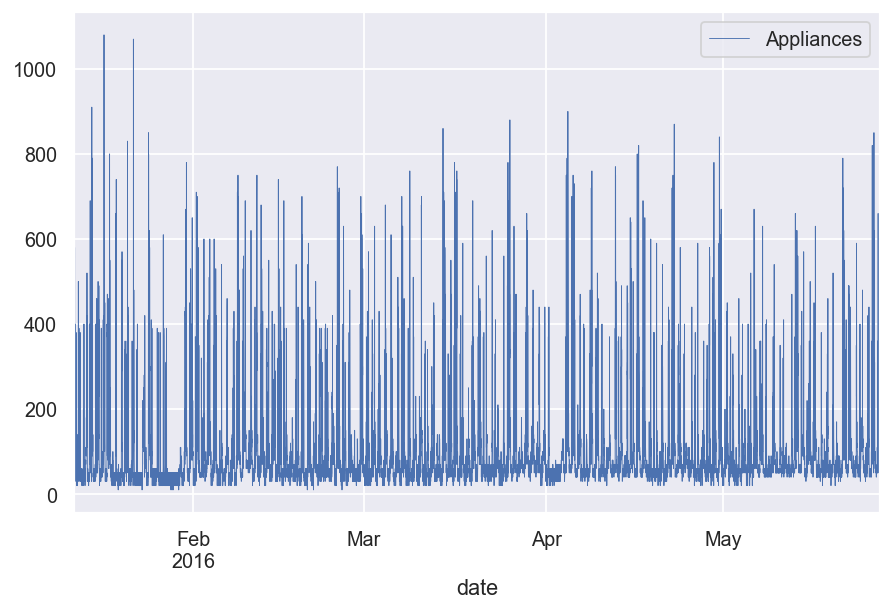

In [23]:
data.plot(linewidth=0.5);

As it has shown in the plots above, we have the  y-axis showing the electricity consumption and the x-axis illustrating the months. 

We can see there are too much data as it has been presented by every 10 minutes. It seems that the highest peaks consumption are in the January month. 
There is a significant fall at the end of January and beginning of April months.

## Resampling
It is often required to resample the dataset at lower or higher frequencies. The resampling will be performed based on an aggregation or group operations. I have resample the data based on houly, daily and weekly, also performed the visualization plots to compare the results. 


### Visualization of hourly mean time series

In [27]:
power_hourly_mean = data.resample('H').mean()
power_hourly_mean

,Appliances
date,
2016-01-11 17:00:00,55.000000
2016-01-11 18:00:00,176.666667
2016-01-11 19:00:00,173.333333
2016-01-11 20:00:00,125.000000
2016-01-11 21:00:00,103.333333
...,...
2016-05-27 14:00:00,101.666667
2016-05-27 15:00:00,76.666667
2016-05-27 16:00:00,135.000000


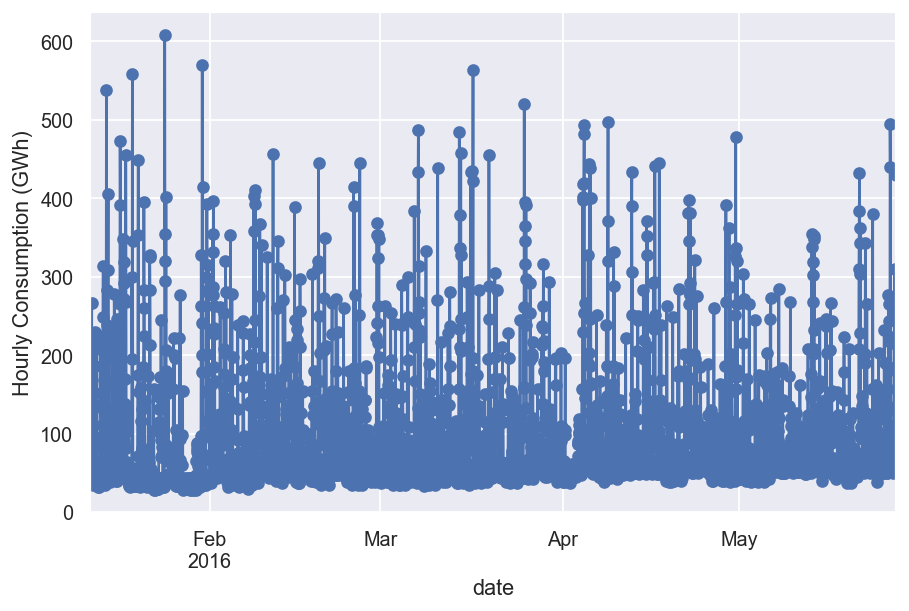

In [28]:
ax = power_hourly_mean['Appliances'].plot(marker='o', linestyle='-')
ax.set_ylabel('Hourly Consumption (GWh)');


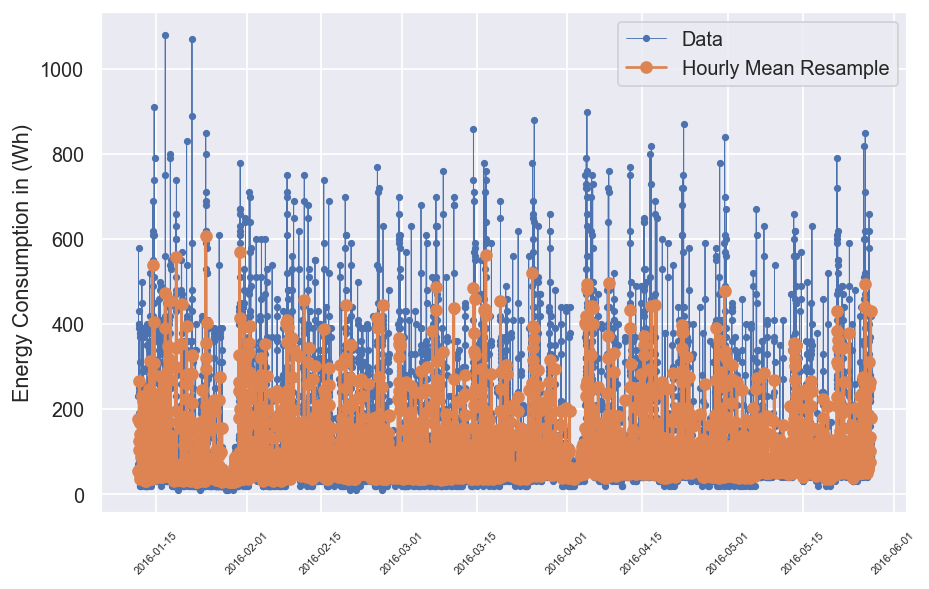

In [29]:
fig, ax = plt.subplots()
ax.plot(data['Appliances'],
marker='.', linestyle='-', linewidth=0.5, label='Data')
ax.plot(power_hourly_mean['Appliances'],
marker='o', markersize=6, linestyle='-', label='Hourly Mean Resample')
ax.set_ylabel('Energy Consumption in (Wh)')
plt.xticks(rotation=45, fontsize=6)

ax.legend();

## Daily average of Energy consumption 

In [31]:
power_daily_mean = data.resample('D').mean()
power_daily_mean

,Appliances
date,
2016-01-11,136.666667
2016-01-12,85.694444
2016-01-13,97.013889
2016-01-14,151.388889
2016-01-15,125.347222
...,...
2016-05-23,83.055556
2016-05-24,96.180556
2016-05-25,83.888889


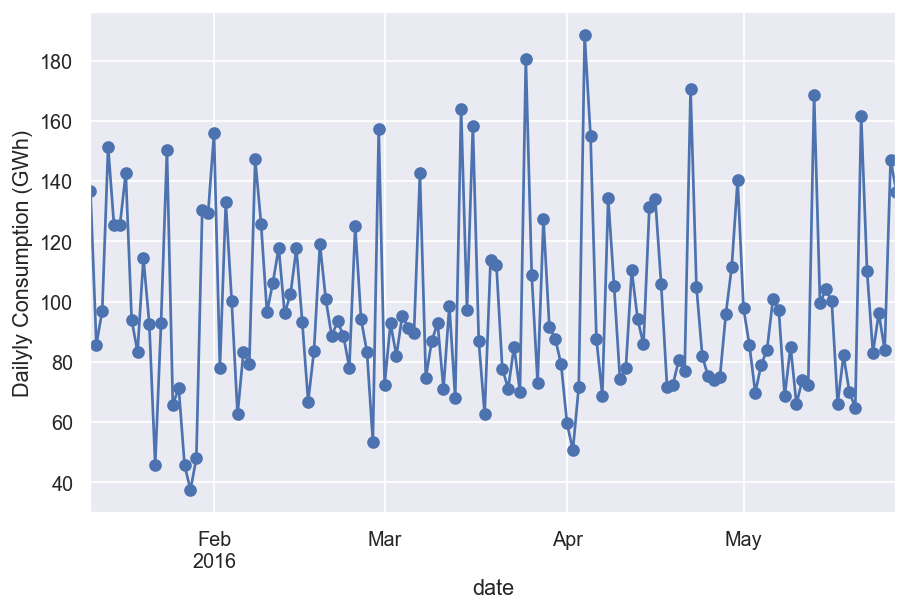

In [32]:
ax = power_daily_mean['Appliances'].plot(marker='o', linestyle='-')
ax.set_ylabel('Dailyly Consumption (GWh)');


The daily mean time series show us a better clear visualization of the data.

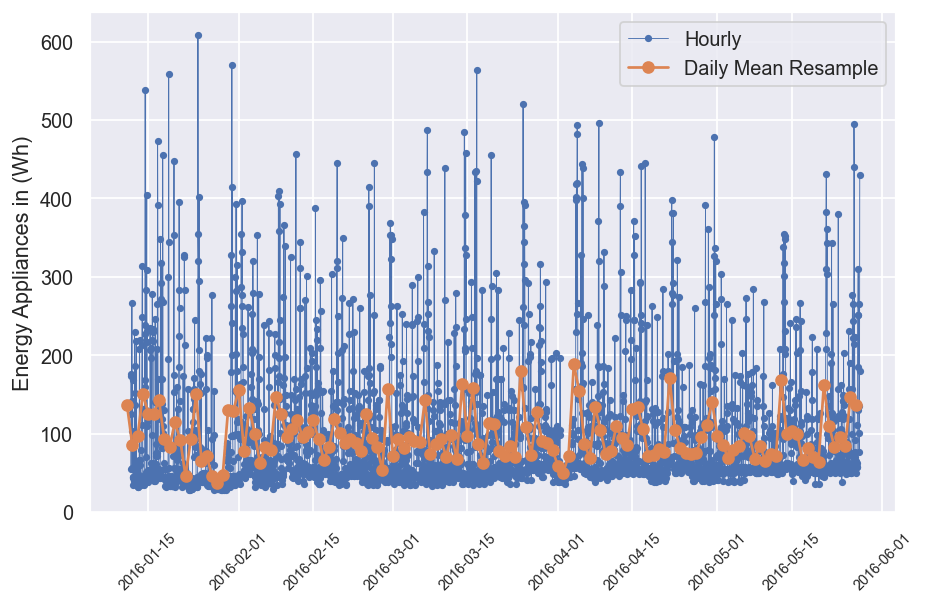

In [34]:
fig, ax = plt.subplots()
ax.plot(power_hourly_mean['Appliances'],
marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(power_daily_mean['Appliances'],
marker='o', markersize=6, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Energy Appliances in (Wh)')
plt.xticks(rotation=45, fontsize=8)

ax.legend();

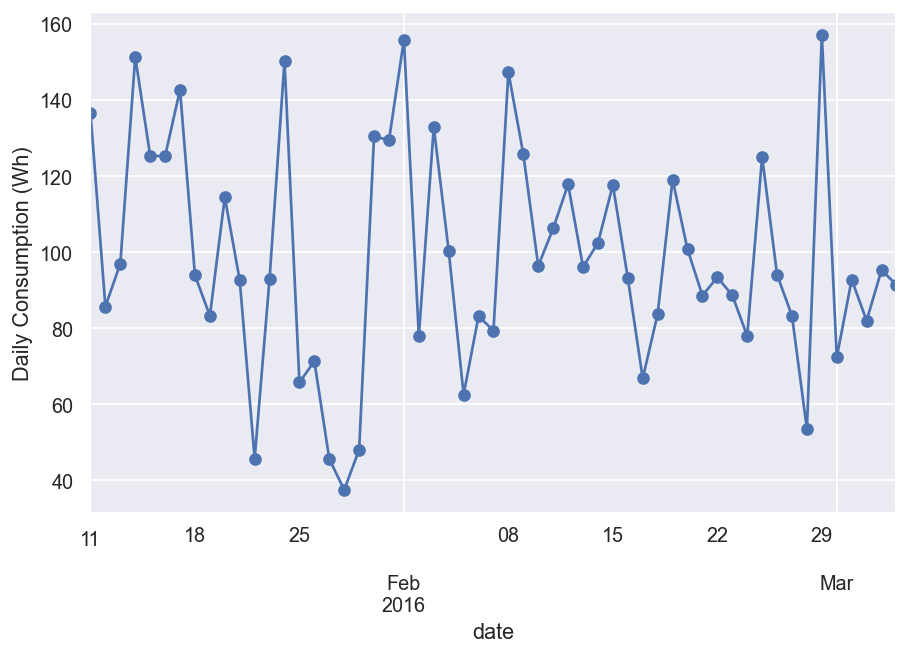

In [35]:
ax = power_daily_mean.loc['2016-01-11':'2016-03-05', 'Appliances'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (Wh)');

We can see the highest peaks of energy consumption are over 140 Wh. There is a significant fall in the last week of January from the 25th, also in February from the 26th, then it will have the highest peak on the 29th February. 


## Weekly average of Energy consumption 

In [38]:
power_weekly_mean = data.resample('W').mean()
power_weekly_mean

,Appliances
date,
2016-01-17,121.953642
2016-01-24,96.190476
2016-01-31,75.456349
2016-02-07,98.888889
2016-02-14,113.164683
2016-02-21,95.704365
2016-02-28,87.996032
2016-03-06,97.251984
2016-03-13,90.674603


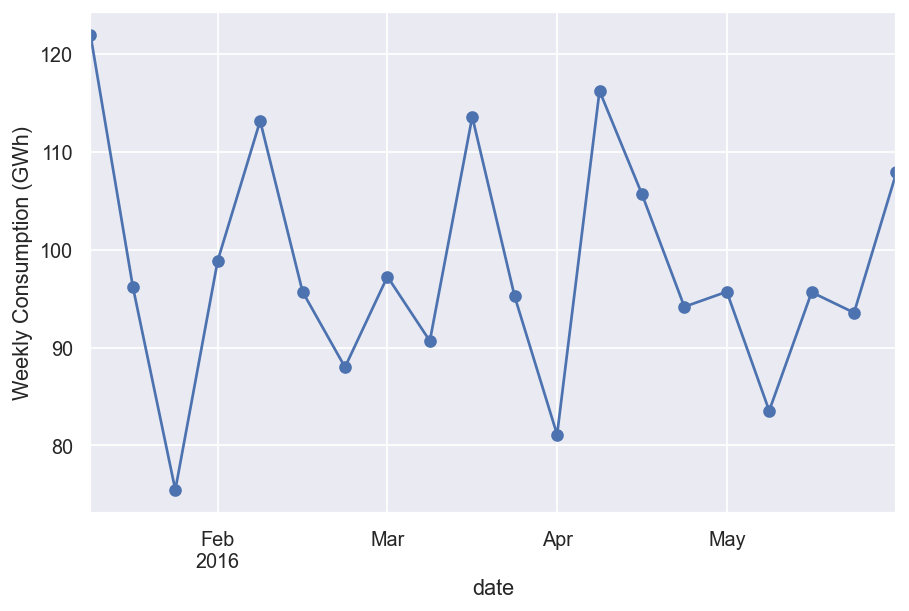

In [39]:
ax = power_weekly_mean['Appliances'].plot(marker='o', linestyle='-')
ax.set_ylabel('Weekly Consumption (GWh)');

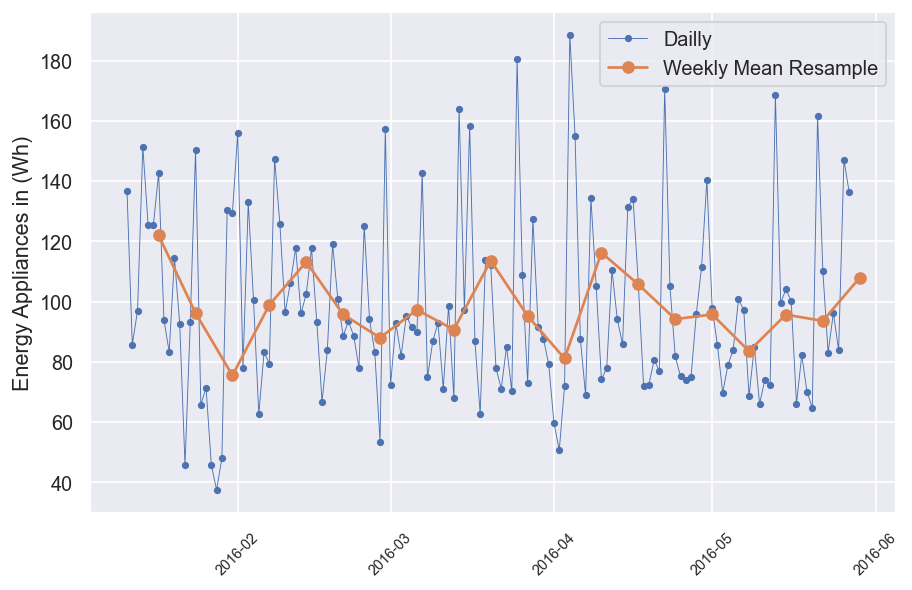

In [40]:
fig, ax = plt.subplots()
ax.plot(power_daily_mean['Appliances'],
marker='.', linestyle='-', linewidth=0.5, label='Dailly')
ax.plot(power_weekly_mean['Appliances'],
marker='o', markersize=6, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Energy Appliances in (Wh)')
plt.xticks(rotation=45, fontsize=8)

ax.legend();

The plot above shows the weekly mean time series versus the daily mean time series. We can see that the week mean data has a much smoother presentation the the daily mean one. 
The week mean time series has not presented an increase over time. 


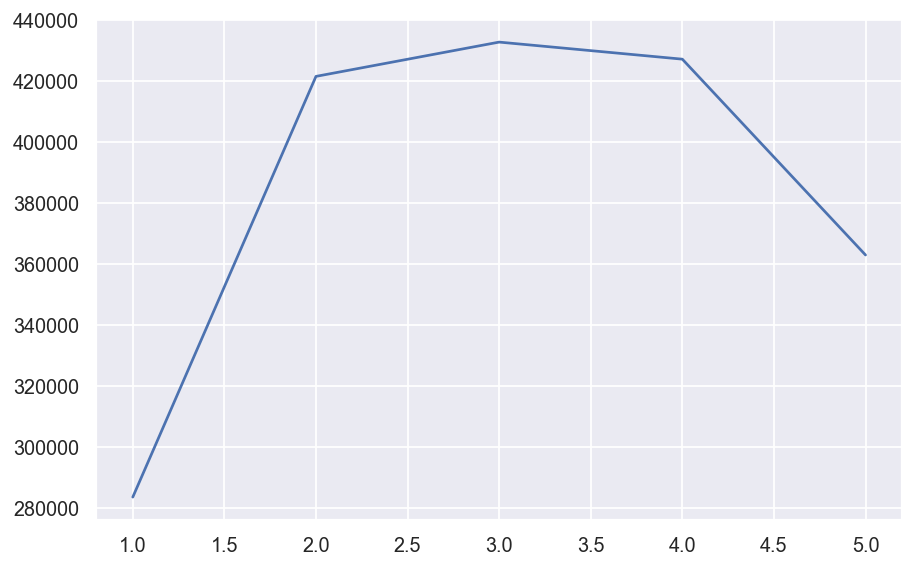

In [42]:
## Month Visualization 
ts_mes = data.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes);

### Decomposition

In order to see if the dataset has any seasonality and trend, it will be used the seasonal_decompose method from Statsmodels. 

The data will will be divided in three parts(trends, seasonal and residual).

trends - an increase or decrease in the data. 

seasonal - when the time series is affected by seasonal factors such as daily hour, week, month, year and so on. 

residual - they are the residuals/errors that have been left after trend and seasonality has been removed. 

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
# Decomposition
decomposition = seasonal_decompose(power_daily_mean)

In [46]:
#trend
trend = decomposition.trend
trend

date
2016-01-11           NaN
2016-01-12           NaN
2016-01-13           NaN
2016-01-14    123.442460
2016-01-15    117.341270
                 ...    
2016-05-23    106.666667
2016-05-24    116.896389
2016-05-25           NaN
2016-05-26           NaN
2016-05-27           NaN
Freq: D, Name: trend, Length: 138, dtype: float64

In [47]:
#seasonal
seasonal = decomposition.seasonal
seasonal

date
2016-01-11    13.908858
2016-01-12   -10.037026
2016-01-13    -6.557180
2016-01-14   -10.154425
2016-01-15     6.151443
                ...    
2016-05-23    13.908858
2016-05-24   -10.037026
2016-05-25    -6.557180
2016-05-26   -10.154425
2016-05-27     6.151443
Freq: D, Name: seasonal, Length: 138, dtype: float64

In [48]:
#residual
residual = decomposition.resid
residual

date
2016-01-11          NaN
2016-01-12          NaN
2016-01-13          NaN
2016-01-14    38.100854
2016-01-15     1.854509
                ...    
2016-05-23   -37.519969
2016-05-24   -10.678807
2016-05-25          NaN
2016-05-26          NaN
2016-05-27          NaN
Freq: D, Name: resid, Length: 138, dtype: float64

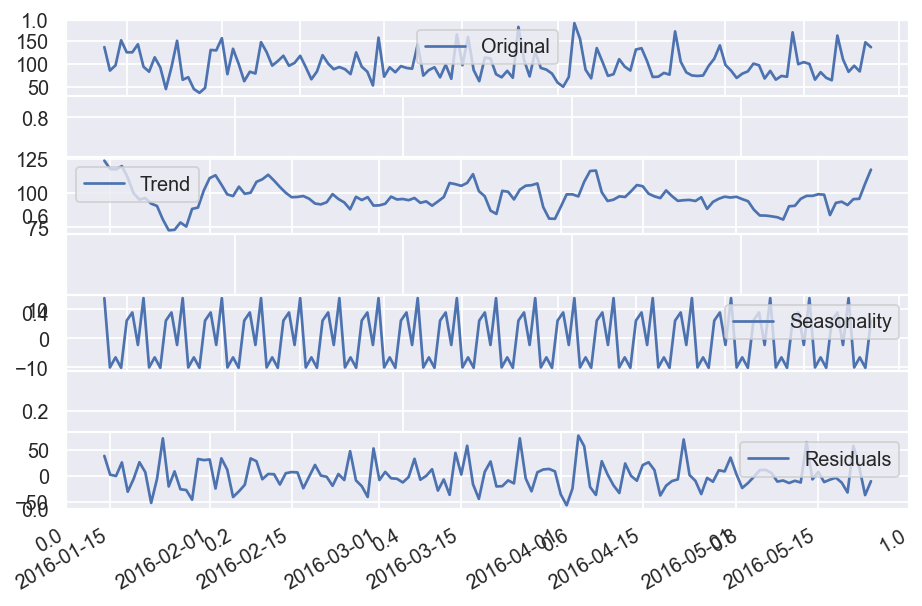

In [49]:
fig, ax = plt.subplots()

plt.subplot(4,1,1)
plt.plot(power_daily_mean, label = 'Original')
plt.legend(loc = 'best')

# Trend visualization 
plt.subplot(4,1,2)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

# Seasonality visualization
plt.subplot(4,1,3)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

# Residuals visualization 
plt.subplot(4,1,4)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()



fig.autofmt_xdate()

In the first plot we have the original power_daily_mean time series with all the components, we can see it presents some seasonality.  

Then in the second plot we can see clearly the trend of our daily time series without the seasonal element. 

In the third graph we have the seasonality element that was extrated from the observed data, we can see with more clarity the regular peaks patterns which in the original time serie was more difficult to be noticed.

Lastly, the plot with the residual element presents what has been left (errors) after the trend and seasonal elements extraction. These are the elements that do not fit on the trend or seasonality. 

A time series may not always have all these elements, it may have the seasonality or trend element only, but also neither of them.  



### Testing to see if the time series is Stationary or not using The Augmented Dickey-Fuller statistical test

In [52]:
pip install statsmodels

In [53]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(power_daily_mean)

(-7.207556417613753,
 2.2791949302334088e-10,
 3,
 134,
 {'1%': -3.480118600110386,
  '5%': -2.8833618426136196,
  '10%': -2.578407034974382},
 1186.9011737523558)

### Test statistic: -7.21
### P-value: 2.28.....-10

#### Since the p-value is less than .05, we can reject the null hypothesis


### Hypotheses: 
H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

HA: The time series is stationary



#### That means the time series is stationary. In other words, it has constant mean and variance over time .



## AUTO-ARIMA 

It is an application of ARIMA, that make the search for the best values, combination of the ARIMA parameters (p, d, q) in order to perform predictions. 

AUTO-ARIMA is an automatic application that discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.

Auto-ARIMA works by conducting differencing tests (i.e.,
Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or
Phillips–Perron) to determine the order of differencing, ``d``, and then
fitting models within ranges of defined ``start_p``, ``max_p``,
``start_q``, ``max_q`` ranges. If the ``seasonal`` optional is enabled,
auto-ARIMA also seeks to identify the optimal ``P`` and ``Q`` hyper-
parameters after conducting the Canova-Hansen to determine the optimal
order of seasonal differencing, ``D``.


In [56]:
#import libraries to perform AUTO-ARIMA 
import pandas as pd
import numpy as np
from datetime import datetime


In [57]:
!pip install pmdarima
from pmdarima.arima import auto_arima

### Visualize the data 

In [59]:
power_daily_mean

,Appliances
date,
2016-01-11,136.666667
2016-01-12,85.694444
2016-01-13,97.013889
2016-01-14,151.388889
2016-01-15,125.347222
...,...
2016-05-23,83.055556
2016-05-24,96.180556
2016-05-25,83.888889


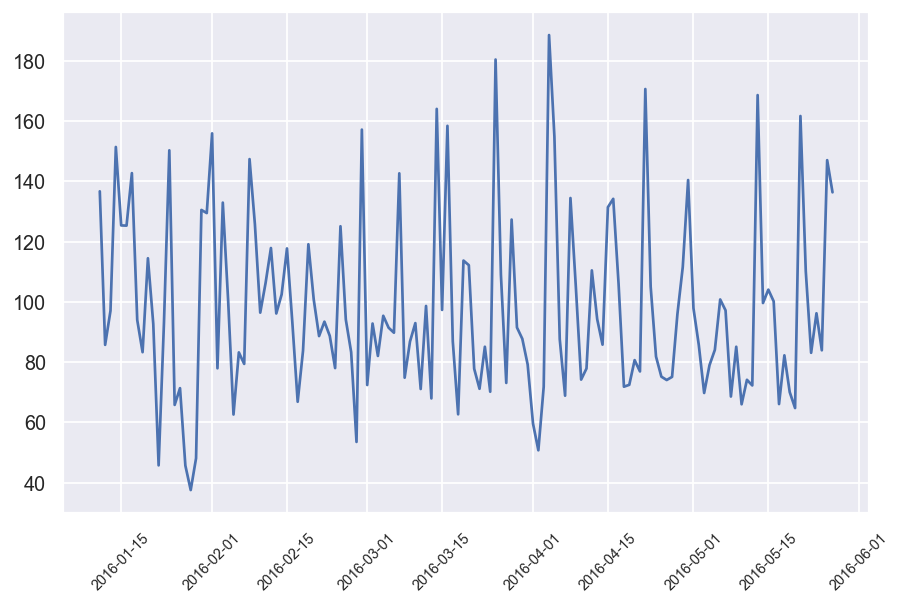

In [123]:
##Plot the data time series 
plt.plot(power_daily_mean)
ax.set_ylabel('Energy Appliances in (Wh)')
plt.xticks(rotation=45, fontsize=8)
ax.legend();


### Set up AUTO-ARIMA 

Auto-ARIMA parameters: Some of the parameters has their default values

start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6

start_p : int, optional (default=2)
    The starting value of ``p``, the order (or number of time lags) of the auto-regressive ("AR") model. 

start_q : int, optional (default=2)
    The starting value of ``q``, the order of the moving-average

d : int, optional (default=None)
The order of first-differencing. If None (by default), the value will automatically be selected based on the results of the ``test``(i.e., either the Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or the Phillips–Perron test will be conducted to find the most probable value).

m : int, optional (default=1) - 12  monthly data. 

max_p : int, optional (default=5)
The maximum value of ``p``, inclusive. Must be a positive integer greater than or equal to ``start_p``.

max_q : int, optional (default=5)
The maximum value of ``q``, inclusive. Must be a positive integer greater than ``start_q``.

Seasonal = True 

stepwise : bool, optional (default=True)
The stepwise algorithm can be significantly faster than fitting all (or a ``random`` subsetof) hyper-parameter combinations and is less likely to over-fit the model.

The AUTO-ARIMA will apply a stepwise search in order to find the best combination for ARIMA model with the parameters that have been set. 

In [63]:
## Set up Auto-ARIMA parameters 
stepwise_model = auto_arima(power_daily_mean, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1337.651, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1336.392, Time=0.10 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1337.262, Time=0.26 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1336.998, Time=0.46 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1337.561, Time=0.44 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1339.262, Time=0.51 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1337.315, Time=0.64 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1339.420, Time=0.95 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1337.519, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1336.565, Time=0.19 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1337.154, Time=0.38 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1337.161, Time=0.28 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1338.262, Time=0.62 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1339.164, Time=0.76 sec


The aim is to minimize the AIC. The lowest the AIC the better the model for make the predictions. 

In [65]:
# Stepwise = True 
print(stepwise_model.aic())

1334.2840102360733


Althought the stepwise=True may be faster, it does not always present the best result. As we can see the lowest AIC is 1334.2814 when run with stepwise=False. 

#### stepwise = False - 1334.281423309481
#### Stepwise = True - 1336.3920014514579


## Training and Testing 

The training and test has been split as following: 

Train - data From beginning of January to 26th of April 

Test - data from 27th April to end of May the 27th. 



In [68]:
train = power_daily_mean.loc['2016-01-11':'2016-04-26']
test = power_daily_mean.loc['2016-04-27':]

train, test.shape

(            Appliances
 date                  
 2016-01-11  136.666667
 2016-01-12   85.694444
 2016-01-13   97.013889
 2016-01-14  151.388889
 2016-01-15  125.347222
 ...                ...
 2016-04-22  170.625000
 2016-04-23  105.000000
 2016-04-24   81.805556
 2016-04-25   75.138889
 2016-04-26   74.027778
 
 [107 rows x 1 columns],
 (31, 1))

In [69]:
#Visualize training data 
train

,Appliances
date,
2016-01-11,136.666667
2016-01-12,85.694444
2016-01-13,97.013889
2016-01-14,151.388889
2016-01-15,125.347222
...,...
2016-04-22,170.625000
2016-04-23,105.000000
2016-04-24,81.805556


In [70]:
#Visualize test data 
test

,Appliances
date,
2016-04-27,75.069444
2016-04-28,95.902778
2016-04-29,111.527778
2016-04-30,140.416667
2016-05-01,97.847222
2016-05-02,85.625000
2016-05-03,69.722222
2016-05-04,78.958333
2016-05-05,84.027778


### Fit the model 

The ARIMA model will be trained with the training data with the best combination that has been found by the AUTO-ARIMA application. 

In [72]:
#Fit the model 
stepwise_model.fit(train)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [73]:
#Set up predict with the same period of test data 
future_forecast = stepwise_model.predict(n_periods=31)

In [74]:
#Prediction - The prediction's results has been based on the test data (same period), that means we have predicted based on what happened already. 
future_forecast

2016-04-27     92.115582
2016-04-28     92.384579
2016-04-29    100.398408
2016-04-30    108.158548
2016-05-01    107.133462
2016-05-02    100.305824
2016-05-03    101.457310
2016-05-04     80.671588
2016-05-05     97.191643
2016-05-06    100.952817
2016-05-07    104.089374
2016-05-08    105.206376
2016-05-09     97.474304
2016-05-10     95.352884
2016-05-11     95.661864
2016-05-12     96.540691
2016-05-13     97.235977
2016-05-14     97.605595
2016-05-15     97.737201
2016-05-16     97.749339
2016-05-17     97.722718
2016-05-18     97.695542
2016-05-19     97.678897
2016-05-20     97.671793
2016-05-21     97.670198
2016-05-22     97.670797
2016-05-23     97.671785
2016-05-24     97.672495
2016-05-25     97.672846
2016-05-26     97.672958
2016-05-27     97.672957
Freq: D, dtype: float64

In [75]:
# Creating a dataframe with the predicted values 
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Appliances"])

future_forecast.head()

,#Appliances
date,
2016-04-27,92.115582
2016-04-28,92.384579
2016-04-29,100.398408
2016-04-30,108.158548
2016-05-01,107.133462


### Evaluating the model 

The blue line is the period of energy consumption on the test data. 
The orange line is the AUTO-ARIMA model prediction.

We can see the AUTO-ARIMA model prediction has not performed well, the prediction line has barely similarity with the actual data. 

Perhaps the amount of data was not sufficient for the model to be able to generalize well. or we should try to change some of the AUTO-ARIMA parameters to see how the model performs again. 

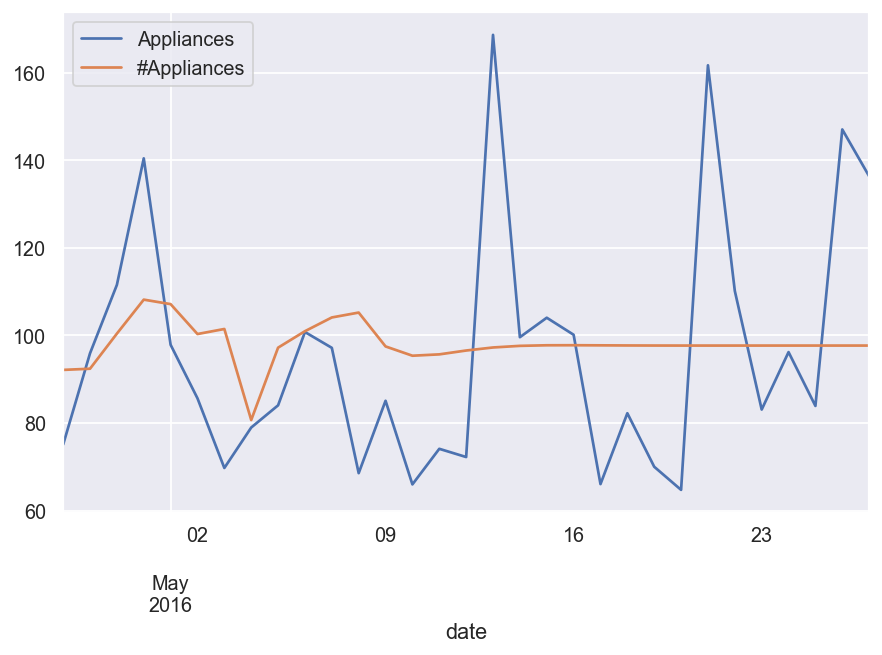

In [77]:
#Blue (test), Orange(prediction)
pd.concat([test,future_forecast],axis=1).plot();

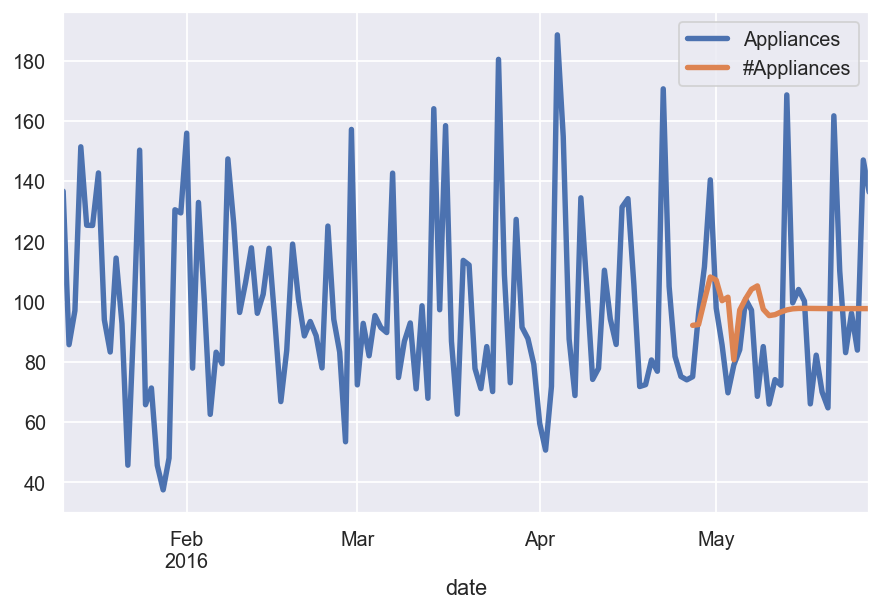

In [78]:
#Visualize the whole data time serie and the prediction performed by the model 
pd.concat([power_daily_mean,future_forecast],axis=1).plot(linewidth=3);